# Data Science Salaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Exploraación de la Data

In [2]:
df = pd.read_csv("ds_salaries.csv")
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


Revisamos los tipos de variables y valores que contiene cada una de las columnas.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [4]:
df.experience_level.value_counts()

experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64

In [5]:
df.employment_type.value_counts()

employment_type
FT    3718
PT      17
CT      10
FL      10
Name: count, dtype: int64

In [6]:
df.job_title.value_counts()

job_title
Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: count, Length: 93, dtype: int64

In [7]:
df.employee_residence.value_counts()

employee_residence
US    3004
GB     167
CA      85
ES      80
IN      71
      ... 
BA       1
AM       1
CY       1
KW       1
MT       1
Name: count, Length: 78, dtype: int64

In [8]:
df.company_location.value_counts()

company_location
US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: count, Length: 72, dtype: int64

In [9]:
df.remote_ratio.value_counts()

remote_ratio
0      1923
100    1643
50      189
Name: count, dtype: int64

In [10]:
df.company_size.value_counts()

company_size
M    3153
L     454
S     148
Name: count, dtype: int64

### Limpieza de Data

In [11]:
list(df.job_title.unique())

['Principal Data Scientist',
 'ML Engineer',
 'Data Scientist',
 'Applied Scientist',
 'Data Analyst',
 'Data Modeler',
 'Research Engineer',
 'Analytics Engineer',
 'Business Intelligence Engineer',
 'Machine Learning Engineer',
 'Data Strategist',
 'Data Engineer',
 'Computer Vision Engineer',
 'Data Quality Analyst',
 'Compliance Data Analyst',
 'Data Architect',
 'Applied Machine Learning Engineer',
 'AI Developer',
 'Research Scientist',
 'Data Analytics Manager',
 'Business Data Analyst',
 'Applied Data Scientist',
 'Staff Data Analyst',
 'ETL Engineer',
 'Data DevOps Engineer',
 'Head of Data',
 'Data Science Manager',
 'Data Manager',
 'Machine Learning Researcher',
 'Big Data Engineer',
 'Data Specialist',
 'Lead Data Analyst',
 'BI Data Engineer',
 'Director of Data Science',
 'Machine Learning Scientist',
 'MLOps Engineer',
 'AI Scientist',
 'Autonomous Vehicle Technician',
 'Applied Machine Learning Scientist',
 'Lead Data Scientist',
 'Cloud Database Engineer',
 'Financial

Existen muchos valores distintos en la columna job_title. Se usó ChatGpt para pedirle que organize los valores en grupos y recomendó que fueran 3: "DATA ANALYST", "DATA SCIENTIST", "DATA ENGINEER".

In [12]:
job_dict = {
    'Data Scientist': [
        'Data Scientist', 'Principal Data Scientist', 'Applied Scientist', 'AI Developer',
        'Research Scientist', 'Head of Data', 'Data Science Manager', 'AI Programmer',  
        'Director of Data Science', 'Machine Learning Scientist', 'Applied Machine Learning Scientist',
        'Lead Data Scientist', 'Deep Learning Researcher', 'Data Science Consultant', 
        'Machine Learning Developer', '3D Computer Vision Researcher', 'Machine Learning Researcher',
        'Data Science Tech Lead', 'Data Scientist Lead', 'Product Data Scientist', 'Data Science Lead',
        'Machine Learning Manager', 'AI Scientist', 'Head of Data Science', 'Applied Data Scientist',
        'Head of Machine Learning', 'Staff Data Scientist'
    ],
    'Data Analyst': [
        'Data Analyst', 'Data Quality Analyst', 'Compliance Data Analyst', 'Business Data Analyst',
        'Lead Data Analyst', 'Marketing Data Analyst', 'Data Analytics Specialist', 'Insight Analyst',
        'Product Data Analyst', 'BI Data Analyst', 'Data Operations Analyst', 'Data Analytics Lead',
        'Principal Data Analyst', 'Financial Data Analyst', 'BI Analyst', 'Data Analytics Manager',
        'Data Analytics Consultant', 'Data Manager', 'Manager Data Management', 'Staff Data Analyst',
        'Finance Data Analyst'
    ],
    'Data Engineer': [
        'Data Engineer', 'Data Modeler', 'Analytics Engineer', 'Business Intelligence Engineer',
        'Data Strategist', 'Data DevOps Engineer', 'Big Data Engineer', 'Data Specialist',
        'BI Data Engineer', 'Data Infrastructure Engineer', 'Cloud Database Engineer', 'ETL Engineer',
        'Data Operations Engineer', 'BI Developer', 'Azure Data Engineer', 'Computer Vision Engineer',
        'Machine Learning Infrastructure Engineer', 'Cloud Data Engineer', 'ETL Developer',
        'Data Architect', 'Big Data Architect', 'Autonomous Vehicle Technician', 'ML Engineer',
        'Machine Learning Software Engineer', 'Data Analytics Engineer', 'Research Engineer',
        'Computer Vision Software Engineer', 'Data Lead', 'Data Management Specialist',
        'Applied Machine Learning Engineer', 'MLOps Engineer', 'Machine Learning Research Engineer',
        'Deep Learning Engineer', 'Machine Learning Engineer', 'Data Science Engineer',
        'Lead Machine Learning Engineer', 'NLP Engineer', 'Principal Machine Learning Engineer',
        'Software Data Engineer', 'Principal Data Architect', 'Lead Data Engineer', 'Marketing Data Engineer',
        'Principal Data Engineer', 'Power BI Developer', 'Cloud Data Architect'
    ]
}

def map_job(job):
    for k, v_list in job_dict.items():
        if job in v_list:
            return k
    return job

- Retiramos las columnas 'salary' y 'salary_currency' puesto que ya contamos con una columna 'salary_in_usd' que funciona como referencia de sueldo internacional. También retiramos 'company_location'.
- Cambiamos de nombre a algunas de las columnas.
- Combinamos el método assign() con funciones lambda para aplicar cambios de tipo de variable y valores de las columnas.
- Usamos la función map_job para recategorizar job_title.

In [13]:
df2 = (df
 .drop(['salary', 'salary_currency', 'company_location'], axis='columns')
 .rename(columns={k:v for k,v in
     {'work_year':'year', 'experience_level':'experience',
      'employment_type':'charge', 'job_title':'occupation',
      'salary_in_usd':'salary', 'employee_residence':'residence'}.items()})
 .assign(experience=lambda df_:df_.experience.replace({
             'SE':'Senior', 'MI':'Middle', 'EN':'Entry',
             'EX':'Executive'}).astype('category'),
         charge=lambda df_:df_.charge.replace({
             'FT':'Full-time', 'PT':'Part-time', 'CT':'Contract',
             'FL':'Freelance'}).astype('category'),
         occupation=lambda df_:df_.occupation.map(map_job).astype('category'),
         residence=lambda df_:df_.residence.astype('category'),
         remote_ratio=lambda df_:df_.remote_ratio.replace({
             0:'Presential', 50:'Hybrid', 100:'Remote'}).astype('category'),
         company_size=lambda df_:df_.company_size.replace({
             'L':'Large', 'M':'Medium', 'S':'Small'}).astype('category'))
)

Revisamos cómo quedó el nuevo DataFrame.

In [14]:
df2

,year,experience,charge,occupation,salary,residence,remote_ratio,company_size
0,2023,Senior,Full-time,Data Scientist,85847,ES,Remote,Large
1,2023,Middle,Contract,Data Engineer,30000,US,Remote,Small
2,2023,Middle,Contract,Data Engineer,25500,US,Remote,Small
3,2023,Senior,Full-time,Data Scientist,175000,CA,Remote,Medium
4,2023,Senior,Full-time,Data Scientist,120000,CA,Remote,Medium
...,...,...,...,...,...,...,...,...
3750,2020,Senior,Full-time,Data Scientist,412000,US,Remote,Large
3751,2021,Middle,Full-time,Data Scientist,151000,US,Remote,Large
3752,2020,Entry,Full-time,Data Scientist,105000,US,Remote,Small
3753,2020,Entry,Contract,Data Analyst,100000,US,Remote,Large


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   year          3755 non-null   int64   
 1   experience    3755 non-null   category
 2   charge        3755 non-null   category
 3   occupation    3755 non-null   category
 4   salary        3755 non-null   int64   
 5   residence     3755 non-null   category
 6   remote_ratio  3755 non-null   category
 7   company_size  3755 non-null   category
dtypes: category(6), int64(2)
memory usage: 84.2 KB


In [16]:
round(df2.describe(), 3)

,year,salary
count,3755.000,3755.000
mean,2022.374,137570.390
std,0.691,63055.625
min,2020.000,5132.000
25%,2022.000,95000.000
50%,2022.000,135000.000
75%,2023.000,175000.000
max,2023.000,450000.000


In [17]:
df2.describe(include='category').transpose()

,count,unique,top,freq
experience,3755,4,Senior,2516
charge,3755,4,Full-time,3718
occupation,3755,3,Data Engineer,1792
residence,3755,78,US,3004
remote_ratio,3755,3,Presential,1923
company_size,3755,3,Medium,3153


### Visualización de data

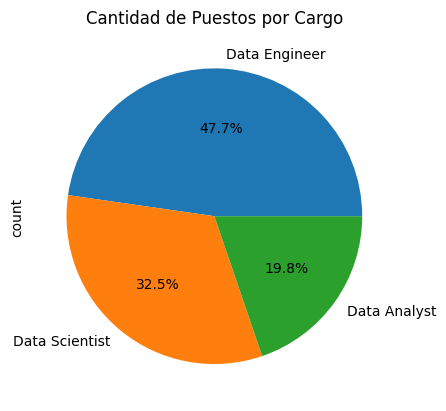

In [18]:
(df2
 .occupation
 .value_counts()
 .plot.pie(title='Cantidad de Puestos por Cargo', autopct='%.1f%%')
);

Se puede ver que los cargos de Data Engineer y Data Scientist son los trabajos con mayor oferta laboral.

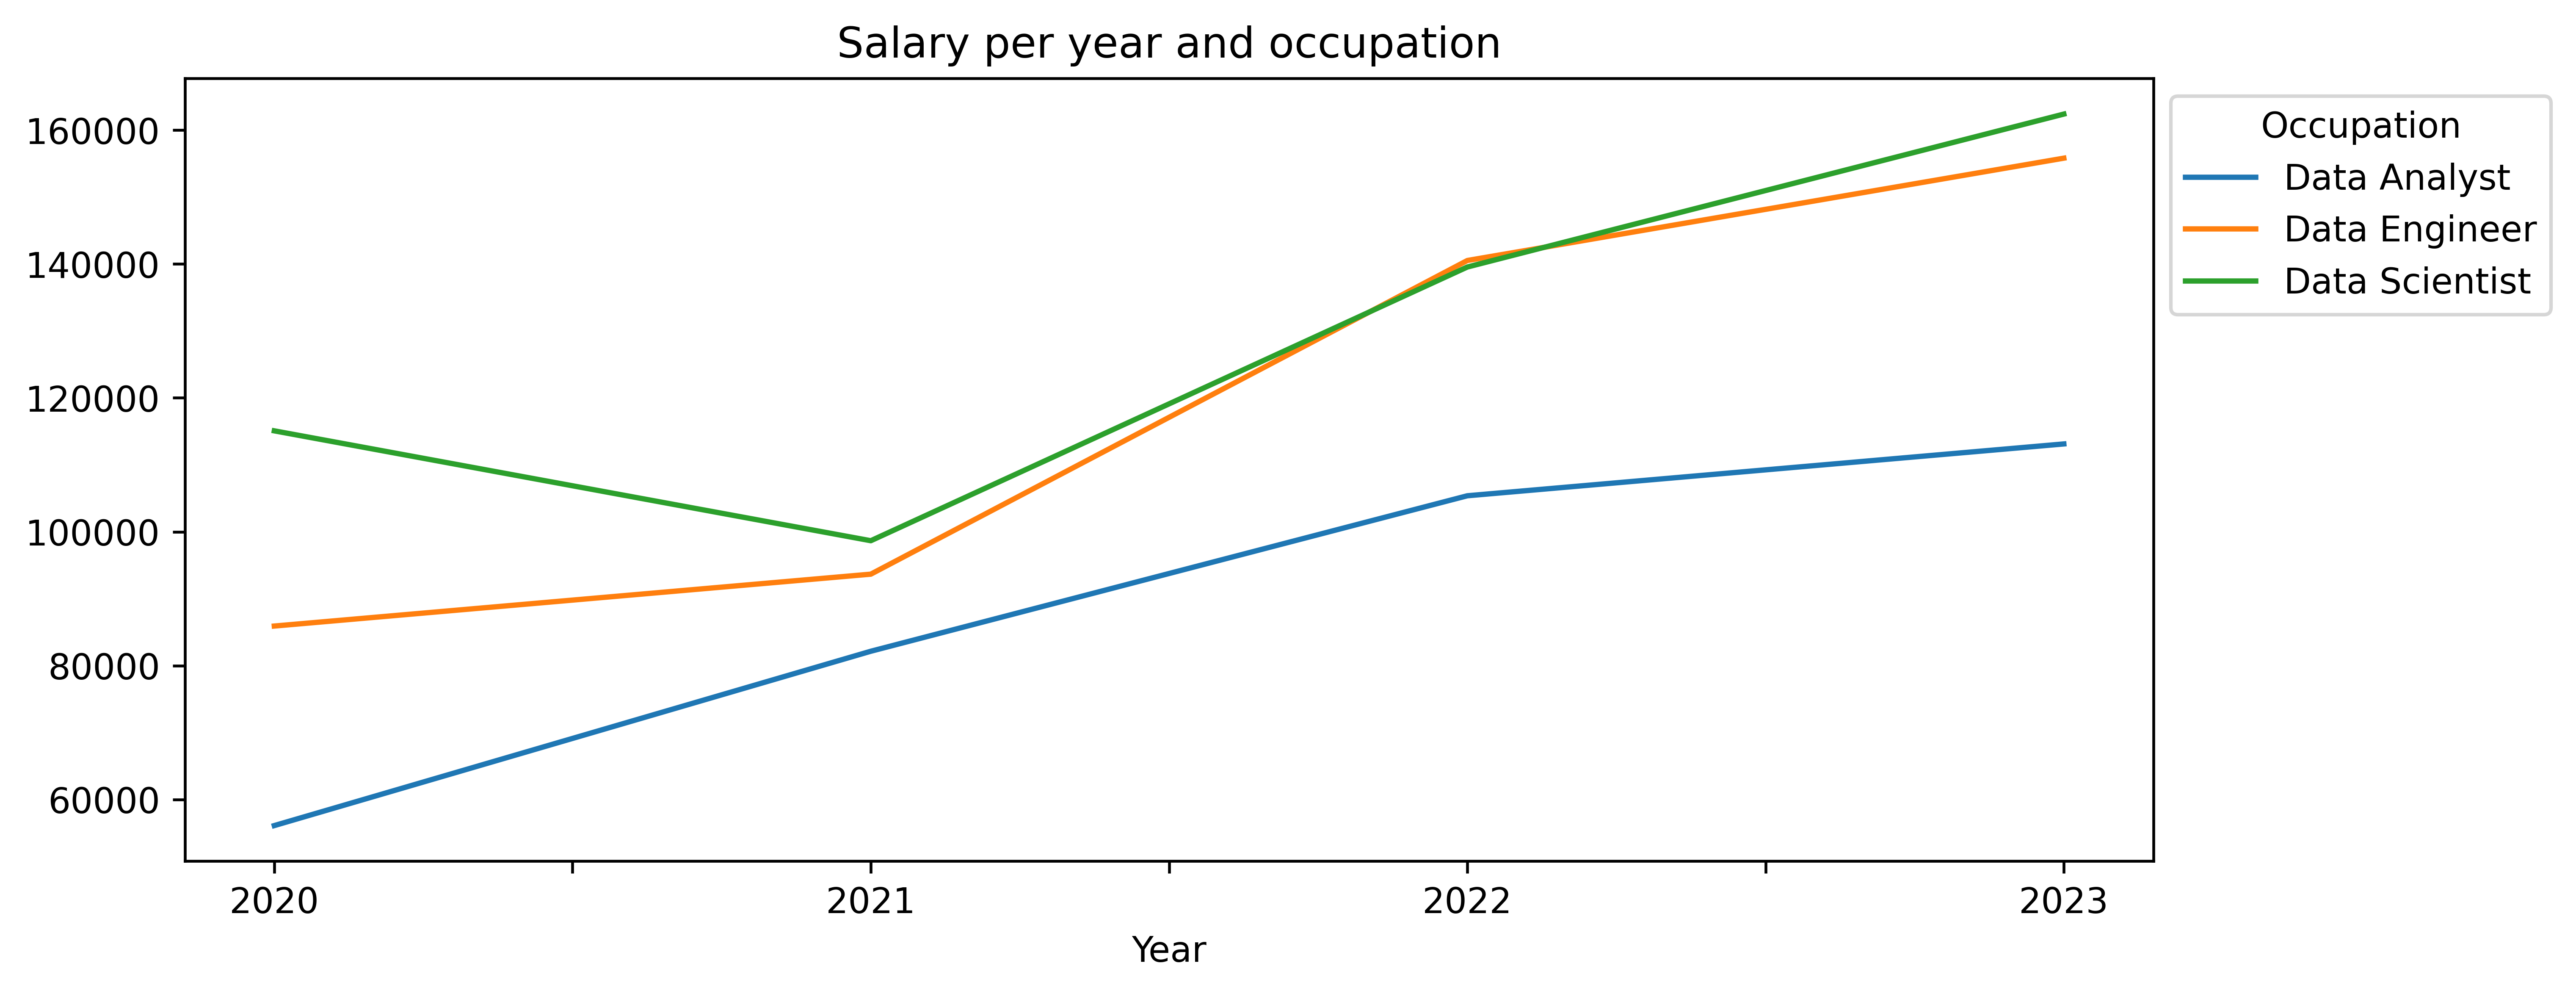

In [19]:
fig, ax = plt.subplots(dpi=600, figsize=(10, 4))
(df2
 .assign(year=lambda df_:df_.year.astype('category'))
 .pivot_table(index='year', columns='occupation', values='salary', aggfunc='mean')
 .plot(ax=ax, title='Salary per year and occupation')
)
ax.set_xlabel('Year')
ax.legend(bbox_to_anchor=(1,1), title='Occupation');

Se observa que durante los últimos años los sueldos para los tres cargos tienen una tendencia a la alza. Data Engineer y Data Scientist perciben sueldos muy similares.

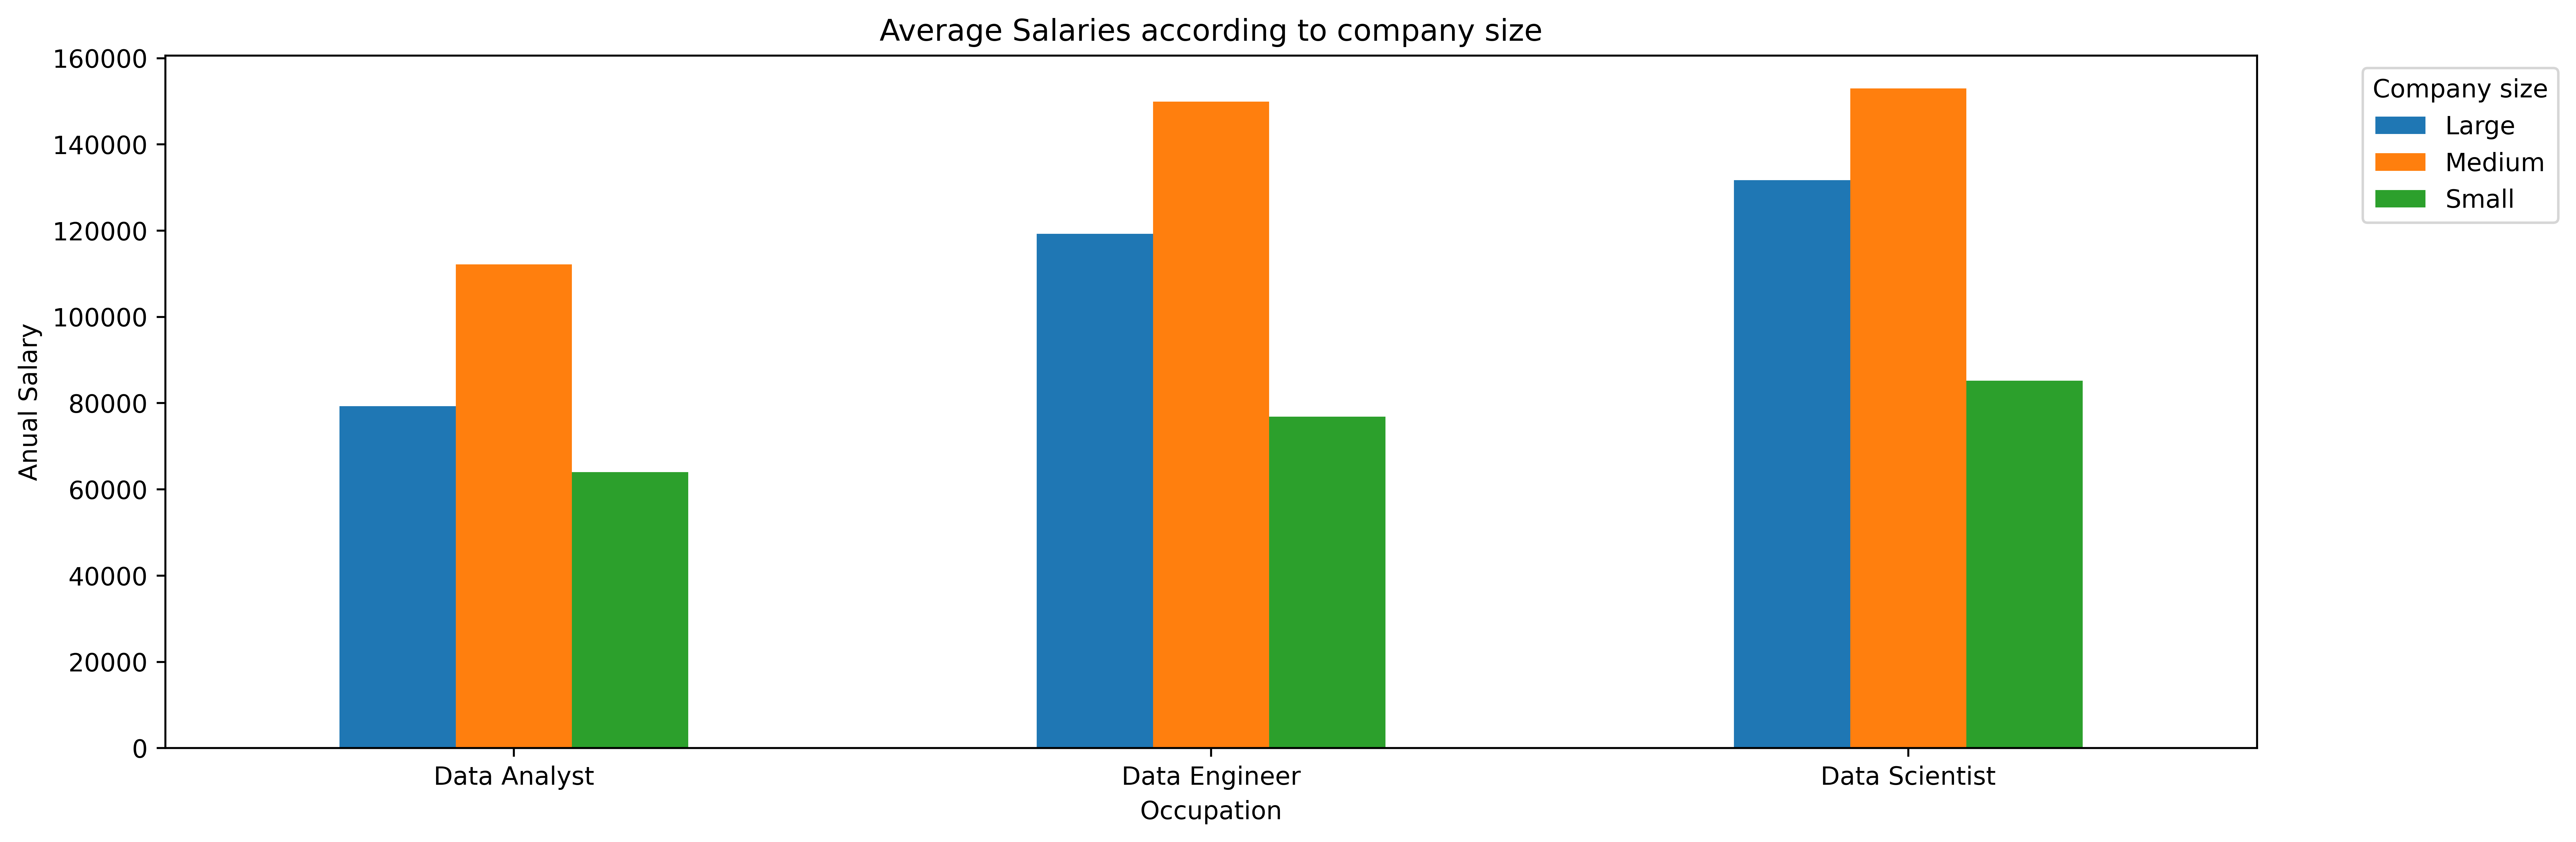

In [20]:
fig, ax = plt.subplots(dpi=600, figsize=(10, 4))
(df2
 .pivot_table(index='occupation', columns='company_size',
     values='salary', aggfunc='mean')
 .plot.bar(ax=ax, rot=0, title='Average Salaries according to company size', 
           figsize=(15,5))
)
ax.set_xlabel('Occupation')
ax.set_ylabel('Anual Salary')
ax.legend(bbox_to_anchor=(1.15,1), title='Company size');

Se puede observar que tanto el cargo de Data Engineer como Data Scientist tienen sueldos muy similares a diferencia de Data Analyst sin import el tamaño de la compañía en la que estén laborando.

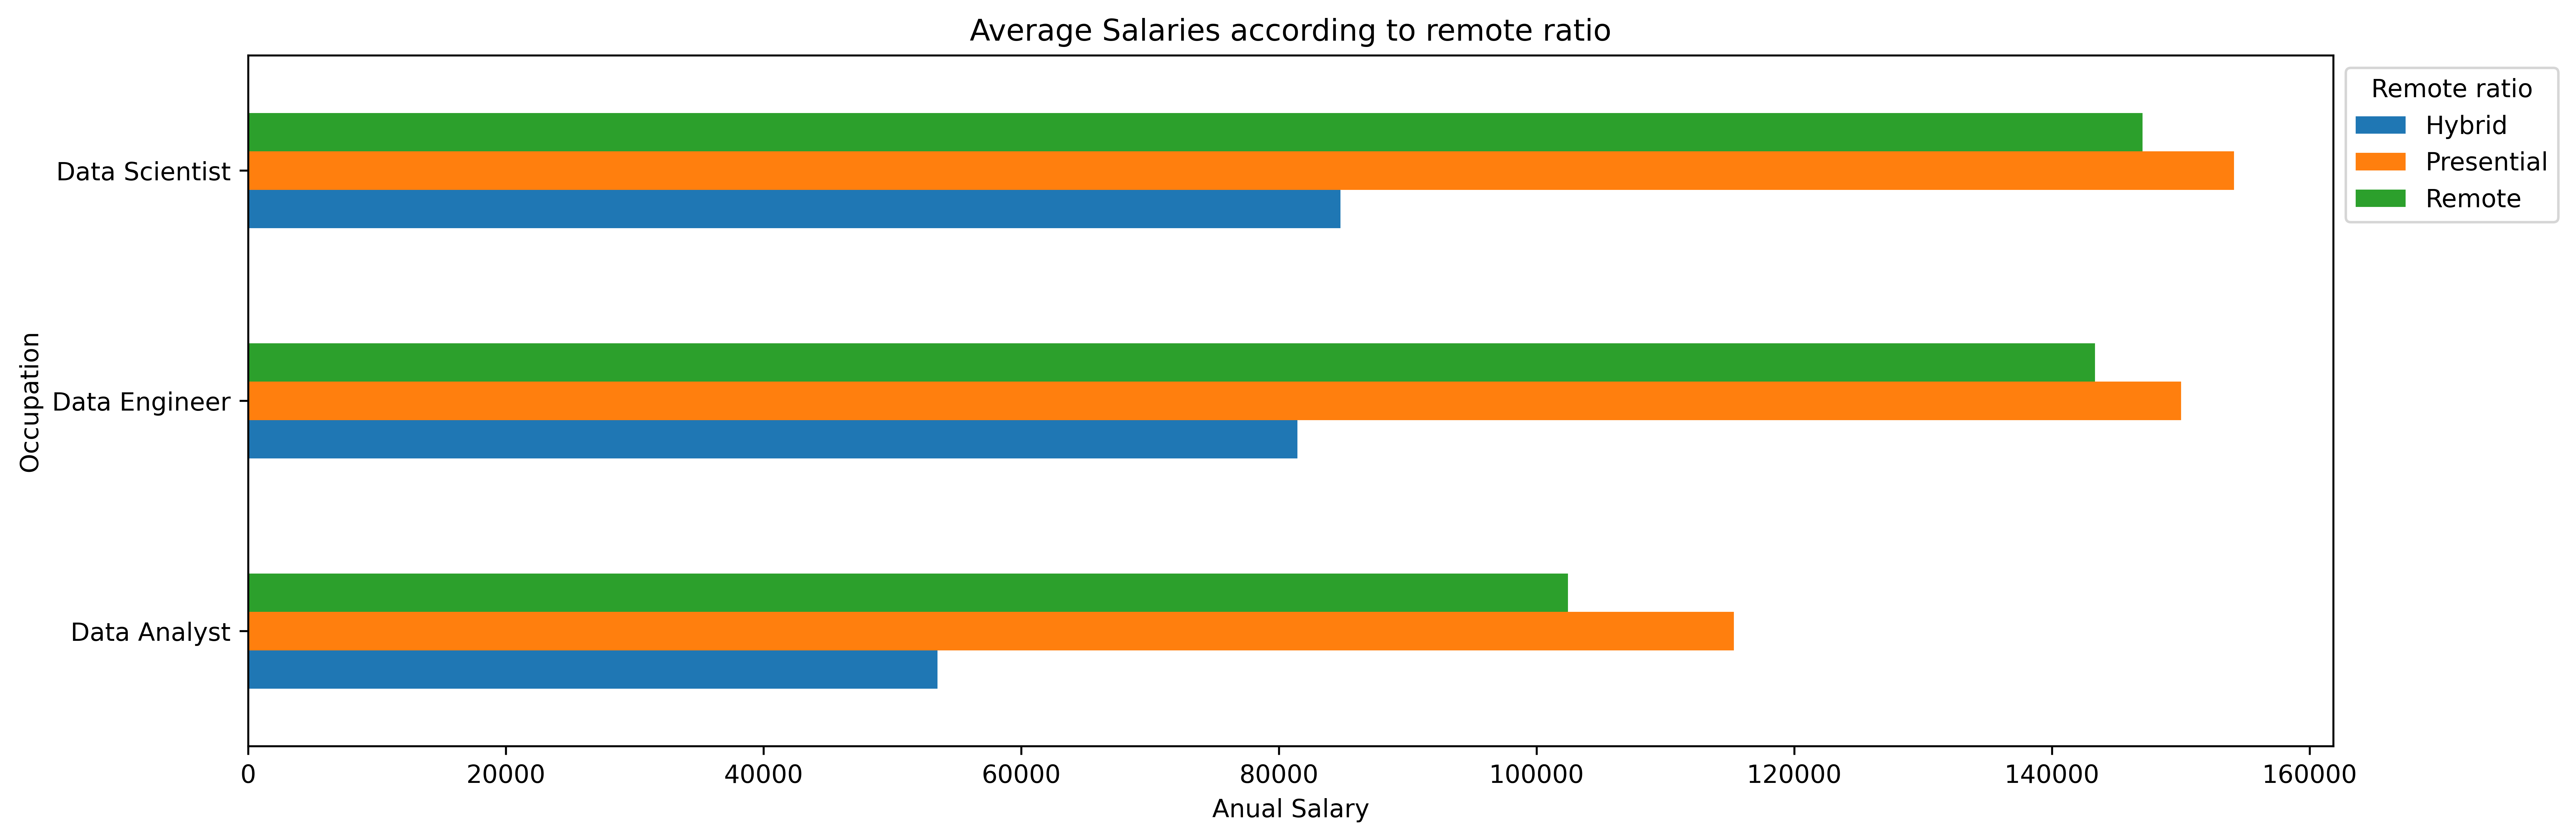

In [21]:
fig, ax = plt.subplots(dpi=600, figsize=(10, 4))
(df2
 .pivot_table(index='occupation', columns='remote_ratio',
     values='salary', aggfunc='mean')
 .plot.barh(ax=ax, rot=0, title='Average Salaries according to remote ratio', 
           figsize=(15,5))
)
ax.set_xlabel('Anual Salary')
ax.set_ylabel('Occupation')
ax.legend(bbox_to_anchor=(1,1), title='Remote ratio');

La diferencia de los sueldos según el cargo que se tiene se mantiene, sin embargo, también se puede observar que tanto los trabajos de tipo presencial y remoto son los mejores pagados.

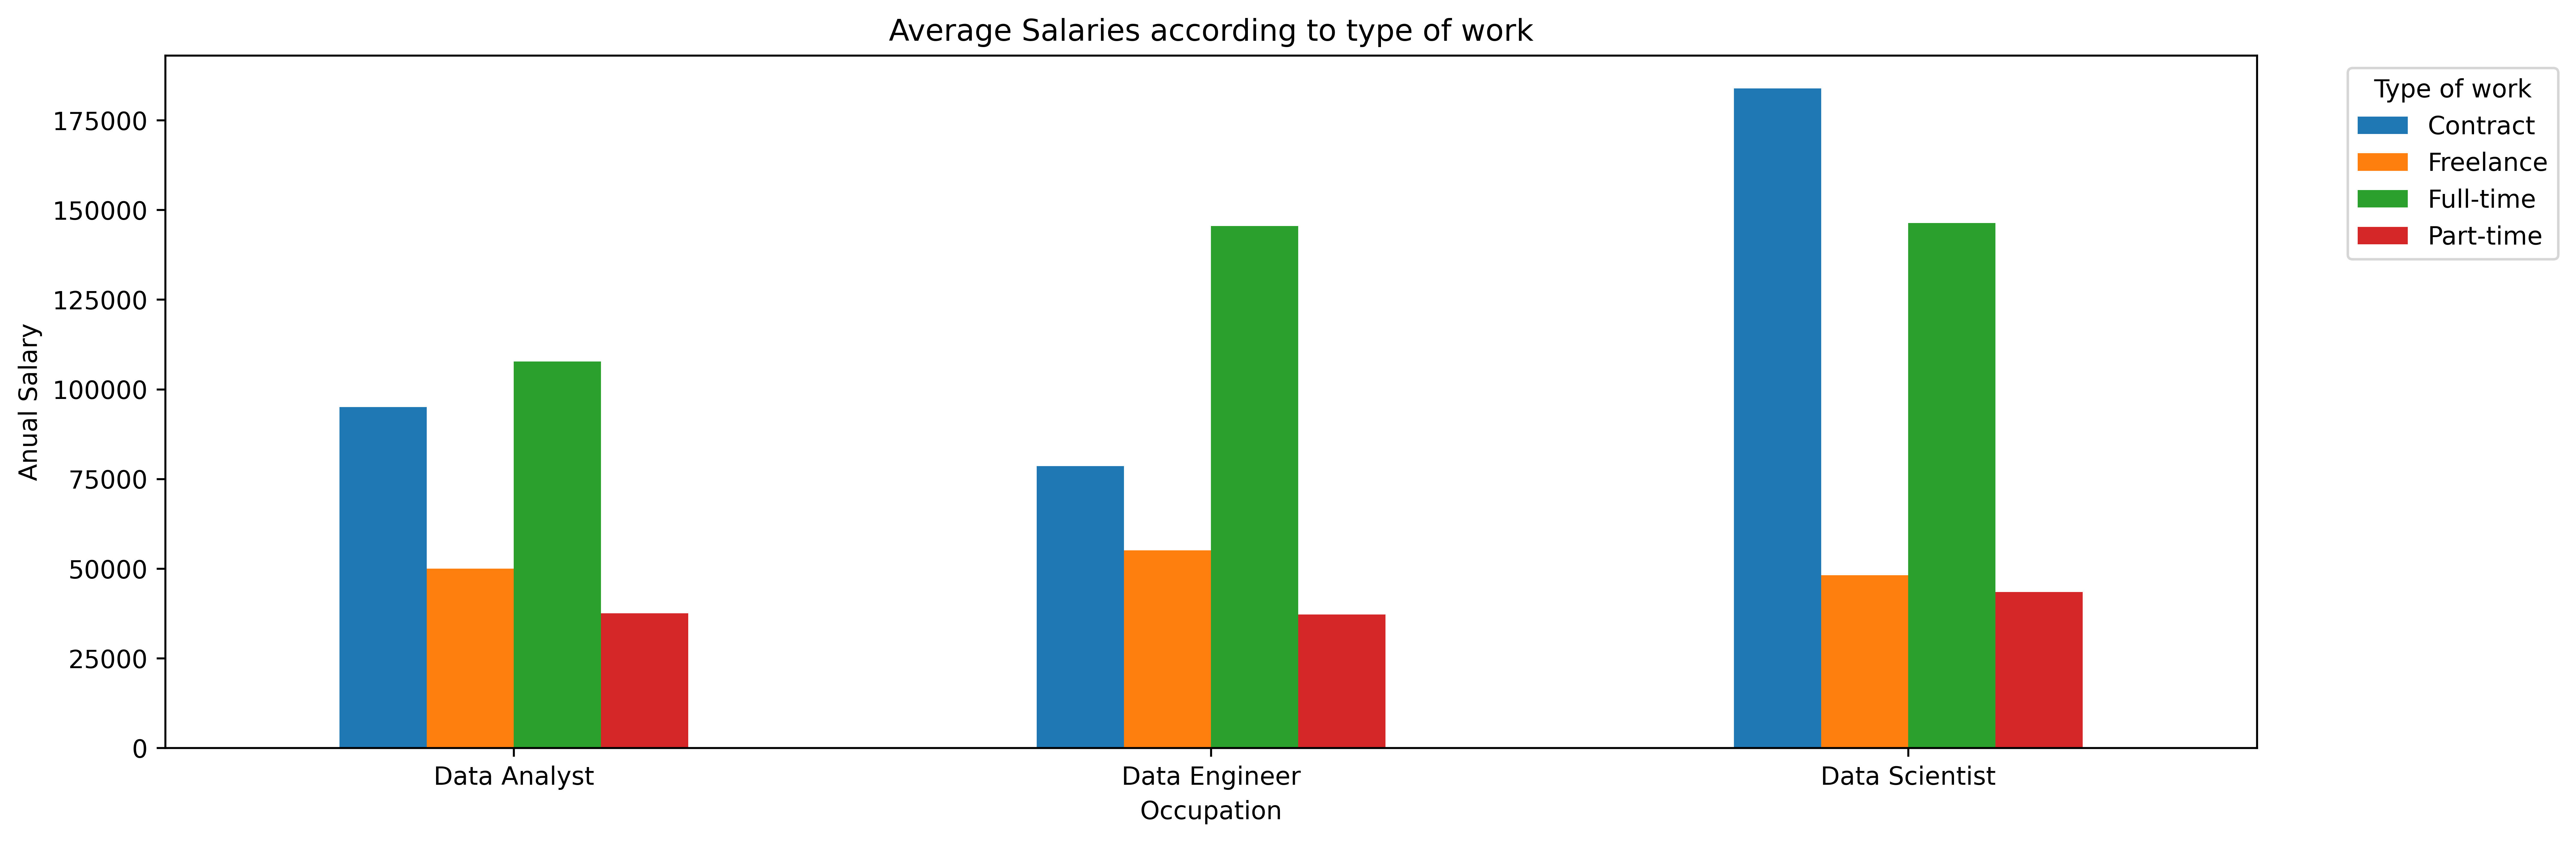

In [22]:
fig, ax = plt.subplots(dpi=600, figsize=(10, 4))
(df2
 .pivot_table(index='occupation', columns='charge',
     values='salary', aggfunc='mean')
 .plot.bar(ax=ax, rot=0, title='Average Salaries according to type of work', 
           figsize=(15,5))
)
ax.set_xlabel('Occupation')
ax.set_ylabel('Anual Salary')
ax.legend(bbox_to_anchor=(1.15,1), title='Type of work');

Se observa que los trabajos a tiempo completo (Full-time) perciben un sueldo más alto. Para el cargo de Data Scientist el tipo de trabajo Contract recibe una mayor remuneración.

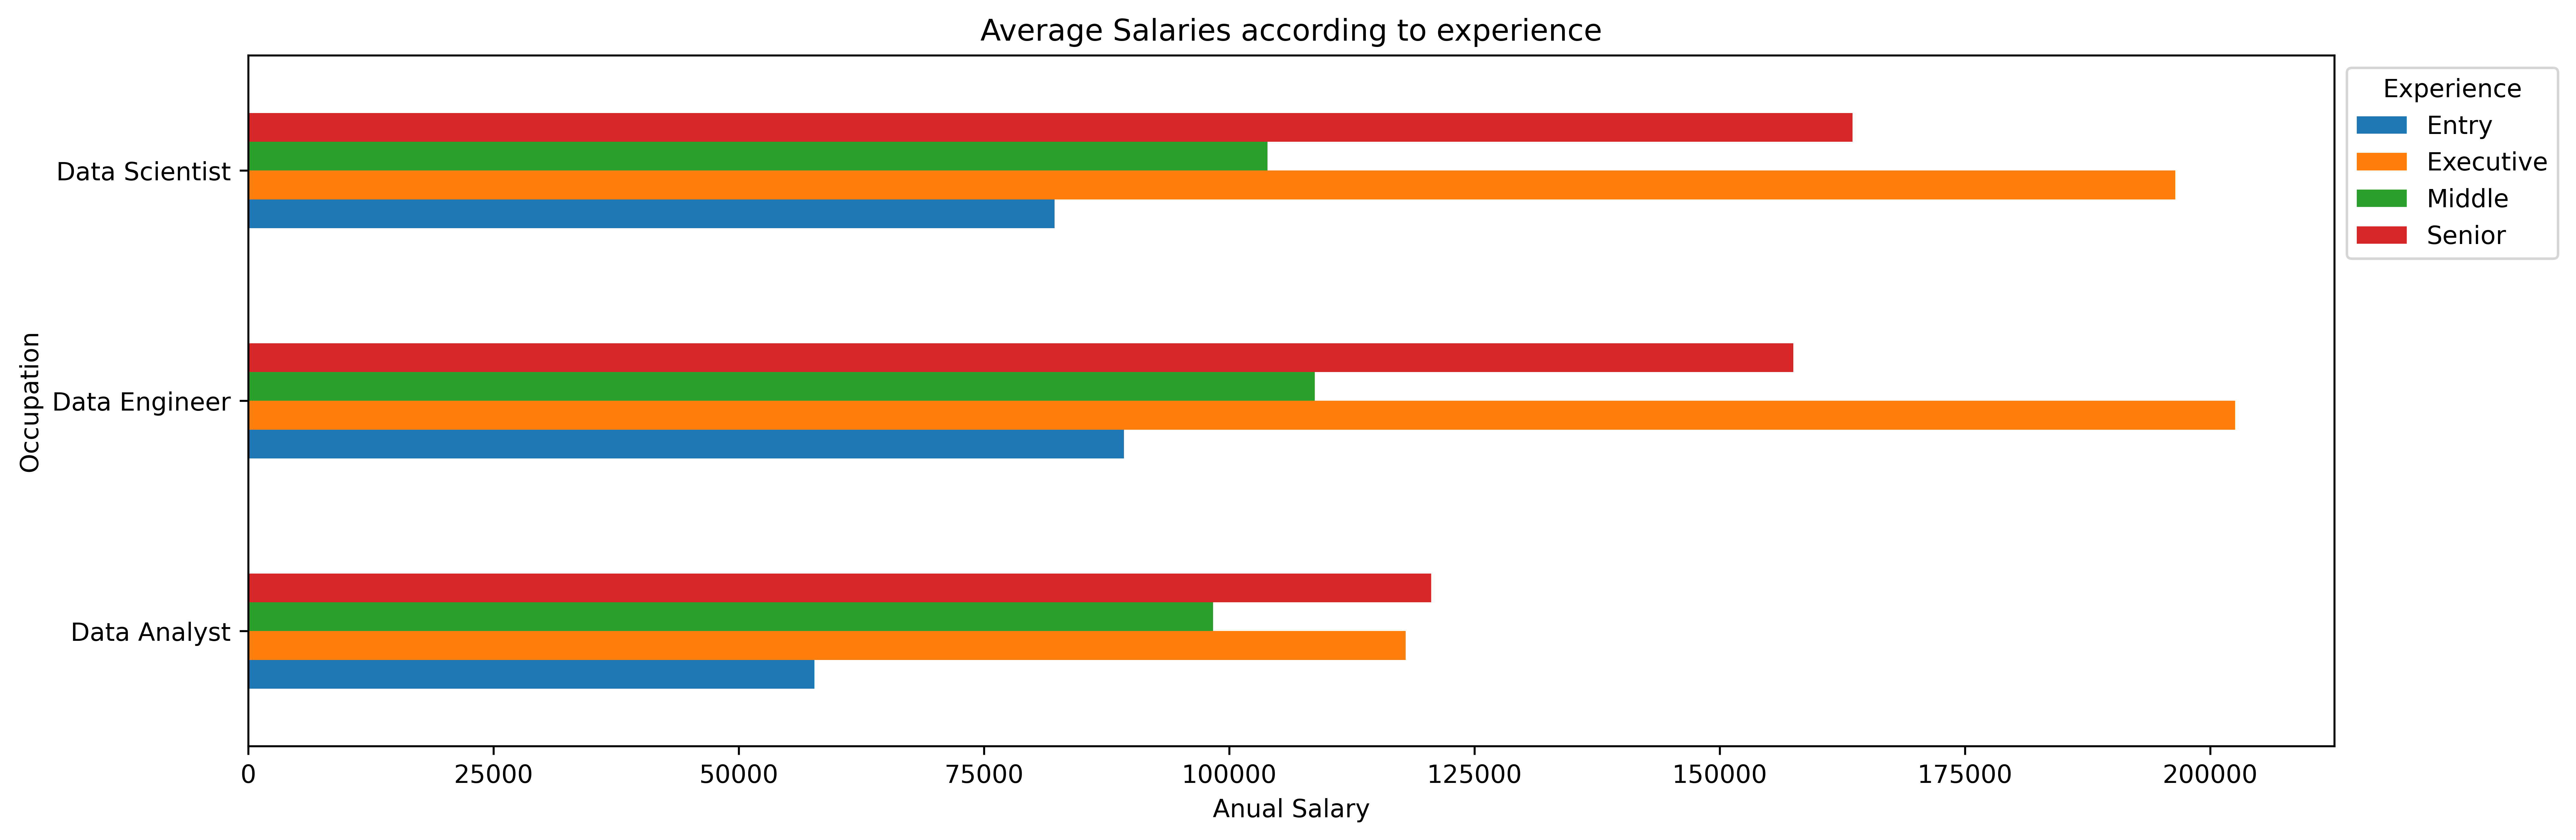

In [23]:
fig, ax = plt.subplots(dpi=600, figsize=(10, 4))
(df2
 .pivot_table(index='occupation', columns='experience',
     values='salary', aggfunc='mean')
 .plot.barh(ax=ax, rot=0, title='Average Salaries according to experience', 
           figsize=(15,5))
)
ax.set_xlabel('Anual Salary')
ax.set_ylabel('Occupation')
ax.legend(bbox_to_anchor=(1,1), title='Experience');

Para cada uno de los trabajos se puede observar que hay crecimiento en el sueldo recibido según la experiencia que tiene la personas, sin embargo, llama la atención que para Data Analyst los sueldos de un Senior y Executive se encuentran muy cerca, a diferencia de los otros dos cargos en que el puesto de Executive recibe un sueldo más alto.